In [4]:
from transform import *
from data import *
from model import *
from tools import *
import torch.optim as optim
from tensorboardX import SummaryWriter

import warnings
warnings.filterwarnings("ignore")

In [5]:
path_300w = '/home/whale/dataset/Landmark/300W'
path_300w_lp = '/home/whale/dataset/Landmark/300W_LP'
path_train = os.path.join(path_300w, "train.xml")
path_test = os.path.join(path_300w, "test.xml")
path_all = os.path.join(path_300w, "all.xml")
path_lp = os.path.join(path_300w_lp, "all.txt")
composed = transforms.Compose([CropByLDK(1.4), Flip(), RandomCrop(), Rescale((64,64)), ToTensor(), Normalize()])

epoch:0 iteration:499 loss:0.0278915659543
epoch:0 iteration:999 loss:0.0139745574379
epoch:0 iteration:1499 loss:0.0111559960814
epoch:0 iteration:1999 loss:0.00966044949647
epoch:0 iteration:2499 loss:0.00824890166149
epoch:0 iteration:2999 loss:0.00732783528743
epoch:0 iteration:3499 loss:0.00684608711163


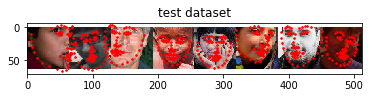

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
writer = SummaryWriter(log_dir='logs')

trainset = Ldk_300W_LP_Dataset(path_lp, path_300w_lp, composed)
testset =  Ldk_300W_Dataset(path_test, path_300w, composed)
#trainset = Ldk_300W_Dataset(path_test, path_300w, composed)
net= MobileNetV2() 
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)
save_path = '/home/whale/workspace/torch/mobile-landmark/landmark.pth'

epoch, batch_size = 30, 32

train(device, net, criterion, optimizer, trainset, testset, epoch, batch_size, save_path, writer)